# Implementasi CNN untuk Image Classification menggunakan CIFAR-10

Outline dari notebook ini dijabarkan sebagai berikut:

1. **Pendahuluan**  
  
2. **Data pre-processing**  
     2.1. Ekstraksi Dataset
     2.2. Memeriksa Bentuk dan Tipe Data
     2.3. Visualisasi
     2.4. Normalisasi
     2.5. One-Hot Encoding  
     2.6. Memisahkan Data Training dan Data Validation      
      
3. **Convolutional Neural Network**  
    3.1. Pendahuluan tentang CNN  
    3.2. Membangun Arsitektur CNN dengan Keras  
    3.3. Konfigurasi Kompilasi Model CNN  
    3.4. Fitting Model CNN  

4. **Analisis Hasil**  
    4.1. Melakukan Visualisasi / Plotting Loss dan Accuracy  
    4.2. Melakukan Visualisasi / Plotting Confusion Matrix  
    4.4. Melakukan Visualisasi / Plotting Error  
  
5. **Prediksi Data Test dan Penyimpanan**  
    5.1. Prediksi Data  
    5.2. Menyimpan Hasil Prediksi dan Model CNN  

<hr>
# 1. Pendahuluan

__CIFAR 10-Dataset__ merupakan sebuah dataset besar yang umumnya digunakan untuk melakukan training dan testing untuk bidang ilmu *Machine Learning*. Dataset CIFAR-10 terdiri dari 60.000 gambar berwarna (RGB) berukuran 32x32 untuk 10 kelas objek, 6.000 gambar untuk setiap kelas.

<p>
    <img src="cifar10_example.png" > </img>
</p>
<p>
    <center><em>Gambar 1. CIFAR-10 Dataset</em></center>
</p>

Pembagian label untuk dataset CIFAR-10 adalah sebagai berikut:

0 : airplane <br>
1 : automobile <br>
2 : bird <br>
3 : cat <br>
4 : deer <br>
5 : dog  <br>
6 : frog  <br>
7 : horse  <br>
8 : ship  <br>
9 : truck  <br>

<hr>
# 2. Data Pre-Processing

Berikut adalah beberapa library yang digunakan untuk melakukan klasifikasi gambar pada notebook ini.


In [1]:
from __future__ import print_function

import numpy as np

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


Dataset yang digunakan kali ini berupa dataset CIFAR-10 yang sudah disediakan oleh library keras, sehingga dataset ini dapat langsung digunakan tanpa harus mengunduh data originalnya. 

Data original CIFAR-10 dapat diunduh di situs resmi: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
from keras.datasets import cifar10

### Ekstraksi Dataset

Dataset CIFAR-10 yang didapatkan langsung dari library ini memiliki struktur:

    {(X_train, Y_train), (X_test, Y_test)}
    
dimana :

X_train adalah data gambar sebagai input untuk proses training

Y_train adalah label data untuk proses training

X_test adalah data gambar sebagai input untuk proses testing

Y_train adalah label data untuk proses testing

In [3]:
# Load the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


### Memeriksa Tipe Data

In [4]:
# Lengkapi kode program

# memeriksa tipe data
print('Tipe data variable train :', type(X_train))
print('Tipe data variable test  :', type(X_test))

Tipe data variable train : <class 'numpy.ndarray'>
Tipe data variable test  : <class 'numpy.ndarray'>


### Memeriksa Bentuk Data

In [5]:
# Lengkapi kode program

# memeriksa bentuk data
print('Shape dari variable train : ', X_train.shape)
print('Shape dari variable test  : ', X_test.shape)

# memeriksa jumlah data
num_train = len(X_train) 
num_test = len(X_test) 
print('\nJumlah training data : ', num_train, 'pasang gambar dan untuk seluruh class/label')
print('Jumlah test data     : ', num_test, 'gambar')

X_train = X_train[:20000]
X_test = X_test[:20000]
Y_train = Y_train[:20000]
Y_test = Y_test[:20000]

print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

Shape dari variable train :  (50000, 32, 32, 3)
Shape dari variable test  :  (10000, 32, 32, 3)

Jumlah training data :  50000 pasang gambar dan untuk seluruh class/label
Jumlah test data     :  10000 gambar
(20000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)
(20000, 1)


Dataset dibagi menjadi 50.000 data (5.000 data untuk setiap kelas) untuk training dan validasi, 10.000 data untuk testing.

In [6]:
# Lengkapi kode program

# menampilkan data training pertama
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ..., 
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ..., 
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ..., 
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ..., 
       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ..., 
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ..., 
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ..., 
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,

### Visualisasi

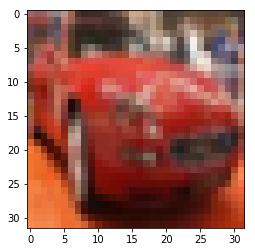

In [7]:
# Lengkapi kode program 

# menampilkan gambar data training ke-lima
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(X_train[5])
plt.show()


### Normalisasi

In [8]:
# Lengkapi kode program

# melakukan normalisasi pada training data dan testing data
x_train_norm = X_train/255.0
x_test_norm = X_test/255.0

# menampilkan data training pertama (yang sudah dinormalisasi)
print(x_train_norm[0])

[[[ 0.23137255  0.24313725  0.24705882]
  [ 0.16862745  0.18039216  0.17647059]
  [ 0.19607843  0.18823529  0.16862745]
  ..., 
  [ 0.61960784  0.51764706  0.42352941]
  [ 0.59607843  0.49019608  0.4       ]
  [ 0.58039216  0.48627451  0.40392157]]

 [[ 0.0627451   0.07843137  0.07843137]
  [ 0.          0.          0.        ]
  [ 0.07058824  0.03137255  0.        ]
  ..., 
  [ 0.48235294  0.34509804  0.21568627]
  [ 0.46666667  0.3254902   0.19607843]
  [ 0.47843137  0.34117647  0.22352941]]

 [[ 0.09803922  0.09411765  0.08235294]
  [ 0.0627451   0.02745098  0.        ]
  [ 0.19215686  0.10588235  0.03137255]
  ..., 
  [ 0.4627451   0.32941176  0.19607843]
  [ 0.47058824  0.32941176  0.19607843]
  [ 0.42745098  0.28627451  0.16470588]]

 ..., 
 [[ 0.81568627  0.66666667  0.37647059]
  [ 0.78823529  0.6         0.13333333]
  [ 0.77647059  0.63137255  0.10196078]
  ..., 
  [ 0.62745098  0.52156863  0.2745098 ]
  [ 0.21960784  0.12156863  0.02745098]
  [ 0.20784314  0.13333333  0.07843

### One Hot Encoding


<p>
    <img src="one_hot.png" > </img>
</p>
<p>
    <center><em>Gambar 2. One Hot Encoding untuk CIFAR-10 Dataset</em></center>
</p>


### Memisahkan Data Training dan Validasi

In [9]:
# kita gunakan class train_test_split untuk melakukan pembagian secara otomatis
from sklearn.model_selection import train_test_split

# kita buat class untuk melakukan random
seed = 2
np.random.seed(seed)

# kita pisahkan sebagian xtrain dan ytrain untuk xval dan yval
xtrain, xval, ytrain, yval = train_test_split(x_train_norm, Y_train,      #input xtrain dan ytrain kita
                                              test_size=0.1,       #presentase porsi untuk xval dan yval
                                              random_state=seed,   #gunakan class random kita agar train_test_split dapat secara random melakukan pemisahan xval dan yval
                                              shuffle=True,        #shuffle data sebelum melakukan pemisahan
                                             )

print('Bentuk xtrain sekarang : ', xtrain.shape)
print('Bentuk ytrain sekarang : ', ytrain.shape)
print('\nBentuk xval sekarang   : ', xval.shape)
print('Bentuk yval sekarang   : ', yval.shape)

# mengganti tipe label
ytrain = to_categorical(ytrain)
yval = to_categorical(yval)

/home/anneke/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Bentuk xtrain sekarang :  (18000, 32, 32, 3)
Bentuk ytrain sekarang :  (18000, 1)

Bentuk xval sekarang   :  (2000, 32, 32, 3)
Bentuk yval sekarang   :  (2000, 1)


<hr>
# 3. CNN Model

Proses selanjutnya adalah membuat model CNN untuk klasifikasi gambar objek. Arsitektur CNN yang akan dibuat pada program ini menggunakan arsitektur seperti yang terlihat di bawah ini: 
    
<p>
    <img src="cnn_arch.png" > </img>
</p>
<p>
    <center><em>Gambar 3. Arsitektur CNN</em></center>
</p>

sumber: https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c


Arsitektur CNN:

* Convolution dengan 64 filters ukuran (3x3), padding=same, strides=1


* Max Pooling dengan ukuran 2 (strides=2)
    - ReLU activation function
    - Batch Normalization


* Convolution dengan 128 filters ukuran (3x3), padding=same, strides=1


* Max Pooling dengan ukuran 2 (strides=2)
    - ReLU activation function
    - Batch Normalization


* Convolution dengan 256 filters ukuran (5x5), padding=same, strides=1


* Max Pooling dengan ukuran 2 (strides=2)
    - ReLU activation function
    - Batch Normalization


* Convolution dengan 512 filters ukuran (5x5), padding=same, strides=1


* Max Pooling dengan ukuran 2 (strides=2)
    - ReLU activation function
    - Batch Normalization


* Flattening the 3-D output


* Fully Connected Layer dengan 128 unit
    - Dropout
    - Batch Normalization


* Fully Connected Layer dengan 256 units
    - Dropout
    - Batch Normalization


* Fully Connected Layer dengan 512 units
    - Dropout
    - Batch Normalization


* Fully Connected Layer dengan 1024 units
    - Dropout
    - Batch Normalization


* Fully Connected Layer dengan 10 unit (jumlah kelas)

In [10]:
# Lengkapi kode program

# model
model = Sequential()

# membuat arsitektur cnn
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', strides=(1,1), input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same', strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(5, 5), activation='relu', padding='same', strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))


In [11]:
# Lengkapi kode program

# menampilkan model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         819456    
__________

### Menentukan Konfigurasi Kompilasi CNN 

In [12]:
# Lengkapi kode program

# Kompilasi model
#    loss = categorical_crossentropy
#    optimizer = adam
#    learning rate = 0.001
#    metrics = accuracy
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


### Model Fitting

In [13]:
# Lengkapi kode program

# Fitting model
#   batch_size = 128
#   epoch = 3
#   verbose = 1

history = model.fit(
    xtrain, ytrain,   #kita inputkan data training kita kedalam CNN
    batch_size=128,   #tetapkan 128 untuk mengambil 128 sample dalam sekali training dalam satu epoch
    epochs=3,         #jumlah epoch, semakin besar semakin bagus namun semakin besar juga kemungkinan overfitting
    verbose=1,        #tetapkan nilai verbosity mode = 1 agar CNN memberikan keterangan yang berarti untuk kita
    validation_data=(xval, yval),    #kita inputkan data validasi agar kita dapat memantau apakah CNN kita mengalami overfitting
)

Train on 18000 samples, validate on 2000 samples
Epoch 1/3
18000/18000 [==============================] - 701s - loss: 2.6867 - acc: 0.1412 - val_loss: 2.7738 - val_acc: 0.1305
Epoch 2/3
18000/18000 [==============================] - 732s - loss: 2.1027 - acc: 0.2326 - val_loss: 3.2688 - val_acc: 0.1135
Epoch 3/3
18000/18000 [==============================] - 733s - loss: 1.8354 - acc: 0.2962 - val_loss: 4.9021 - val_acc: 0.1185


### Analisa Hasil

In [14]:
print(history.history['loss'])

[2.68672485754225, 2.1027110854254829, 1.8354335523181491]


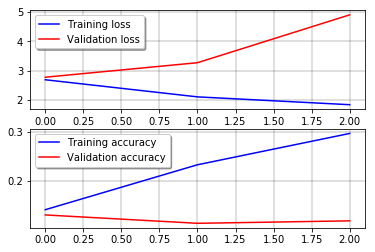

In [15]:
# Lengkapi kode program

#plot perbandingan training loss dan validation loss
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)



#plot perbandingan training acc dan validation acc
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

### Prediksi

In [16]:
# Lengkapi kode program
predictions = model.predict_classes(x_test_norm, verbose=1)

10000/10000 [==============================] - 113s   


In [17]:
# cetak informasi variable prediksi
print('Tipe data predictions : ', type(predictions))
print('Isi data predictions  : ', predictions)

Tipe data predictions :  <class 'numpy.ndarray'>
Isi data predictions  :  [6 2 4 ..., 6 6 6]


In [18]:
# menampilkan shape dari hasil prediksi
print(predictions.shape)

# menyamakan dimensi antara hasil prediksi dengan label ground-truth (Y_test)
Y_test=np.reshape(Y_test, [-1])

# menampilkan shape hasil prediksi
print(Y_test.shape)

(10000,)
(10000,)


In [19]:
# menghitung error
error = (predictions - Y_test != 0)

In [20]:
# menampilkan kesalahan prediksi
print(error)

[ True  True  True ...,  True  True  True]


In [21]:
# menghitung jumlah kesalaha prediksi
np.count_nonzero(error)

# menghitung tingkat akurasi
acc = np.count_nonzero(error)/len(error)

# menampilkan tingkat akurasi
print(acc)

0.8914
